In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [6]:
kobe = pd.read_csv('data/Kobe.csv')

In [7]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC

In [8]:
kobe.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [56]:
#сделаем сразу массив not_needed - куда будем записывать параметры, которые затем удалим.
not_needed = []

In [9]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [11]:
kobe.shape

(30697, 25)

In [17]:
random_sample = kobe.take(np.random.permutation(len(kobe))[:3])
random_sample.T

,17820,835,16169
action_type,Jump Shot,Running Jump Shot,Fadeaway Jump Shot
combined_shot_type,Jump Shot,Jump Shot,Jump Shot
game_event_id,315,150,558
game_id,21001053,20000545,20900935
lat,33.8433,33.8843,33.9673
loc_x,176,-92,144
loc_y,201,160,77
lon,-118.094,-118.362,-118.126
minutes_remaining,4,7,2
period,3,2,4


In [25]:
kobe[['action_type','shot_made_flag' ]].groupby(['action_type']).agg('count').sort_values('shot_made_flag', ascending = False)



,shot_made_flag
action_type,
Jump Shot,15836
Layup Shot,2154
Driving Layup Shot,1628
Turnaround Jump Shot,891
Fadeaway Jump Shot,872
Running Jump Shot,779
Pullup Jump shot,402
Turnaround Fadeaway shot,366
Slam Dunk Shot,334


In [26]:
kobe[['combined_shot_type','shot_made_flag' ]].groupby(['combined_shot_type']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
combined_shot_type,
Jump Shot,19710
Layup,4532
Dunk,1056
Tip Shot,152
Hook Shot,127
Bank Shot,120


выглядит, что сезон нам не очень то нужен, т.к. по сути он содержит в себе информацию о годе, удалим данный столбец, при этом из даты игры вытащим информацию о годе, порядковом дне в году и порядковом дне в неделю.

In [28]:
kobe[['season','shot_made_flag' ]].groupby(['season']).agg('count')#.sort_values('shot_made_flag', ascending = False)

,shot_made_flag
season,
1996-97,383
1997-98,810
1998-99,765
1999-00,1312
2000-01,1575
2001-02,1708
2002-03,1852
2003-04,1371
2004-05,1127


In [69]:
not_needed.append('season')

In [67]:
kobe['game_date'] = pd.to_datetime(kobe['game_date'])
kobe['game_year'] = kobe['game_date'].dt.year
kobe['game_day_year'] = kobe['game_date'].dt.dayofyear
kobe['game_day_week'] = kobe['game_date'].dt.dayofweek

not_needed.append('game_date')

In [29]:
kobe[['shot_type','shot_made_flag' ]].groupby(['shot_type']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
shot_type,
2PT Field Goal,20285
3PT Field Goal,5412


In [62]:
#сделаем сразу из этих полей одно - признак 3-х очкового броска, shot_type удалим
kobe['3pt_flag'] = np.where(kobe['shot_type'].str.contains('3PT'), 1, 0)
#kobe[kobe['3pt_flag']==1].head(5)
not_needed.append('shot_type')

In [30]:
kobe[['shot_zone_area','shot_made_flag' ]].groupby(['shot_zone_area']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
shot_zone_area,
Center(C),11289
Right Side Center(RC),3981
Right Side(R),3859
Left Side Center(LC),3364
Left Side(L),3132
Back Court(BC),72


In [31]:
kobe[['shot_zone_basic','shot_made_flag' ]].groupby(['shot_zone_basic']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
shot_zone_basic,
Mid-Range,10532
Restricted Area,5932
Above the Break 3,4720
In The Paint (Non-RA),3880
Right Corner 3,333
Left Corner 3,240
Backcourt,60


In [32]:
kobe[['shot_zone_area','shot_made_flag' ]].groupby(['shot_zone_area']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
shot_zone_area,
Center(C),11289
Right Side Center(RC),3981
Right Side(R),3859
Left Side Center(LC),3364
Left Side(L),3132
Back Court(BC),72


In [33]:
kobe[['shot_zone_range','shot_made_flag' ]].groupby(['shot_zone_range']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
shot_zone_range,
Less Than 8 ft.,7857
16-24 ft.,6907
8-16 ft.,5580
24+ ft.,5281
Back Court Shot,72


В одном из ноутбуков был применён подход по расчёту точного расстояния и угла броска, в этом случае можно было бы избавить от трёх фичей выше, т.к. они по сути делают категории на основании этого параметра. Также под сомнением необходимость округлённого значения shot_distance

Попробуем сделать этот расчёт, и посмотрим далее, какие фичи дадут больший эффект. ToDo - погуглить, какой подход считается более правильным (есть ощущение, что с т.з. риска переобучения лучше оставлять категории)

In [83]:
kobe['dist'] = np.sqrt(kobe['loc_x']**2 + kobe['loc_y']**2)

loc_x_zero = kobe['loc_x'] == 0
kobe['angle'] = np.array([0]*len(kobe))
kobe['angle'][~loc_x_zero] = np.arctan(kobe['loc_y'][~loc_x_zero] / kobe['loc_x'][~loc_x_zero])
kobe['angle'][loc_x_zero] = np.pi / 2 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,opponent,shot_id,3pt_flag,game_year,game_day_year,game_day_week,remaining_time_sec,home_match_flag,dist,angle
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,POR,1,0,2000,305,1,627,0,181.859836,0.407058
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,POR,2,0,2000,305,1,622,0,157.000000,-0.000000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,POR,3,0,2000,305,1,465,0,168.600119,-0.928481
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,POR,4,0,2000,305,1,412,0,222.865430,0.903063
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,POR,5,0,2000,305,1,379,0,0.000000,1.570796


In [34]:
kobe[['team_name','shot_made_flag' ]].groupby(['team_name']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
team_name,
Los Angeles Lakers,25697


In [63]:
not_needed.extend(['team_name', 'team_id'])

In [64]:
not_needed.extend(['season'])

In [65]:
not_needed

['shot_type', 'team_name', 'team_id', 'season']

In [36]:
kobe[['matchup','shot_made_flag' ]].groupby(['matchup']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
matchup,
LAL @ SAS,853
LAL vs. SAS,765
LAL @ PHX,751
LAL @ SAC,751
LAL vs. HOU,722
LAL vs. PHX,721
LAL @ DEN,712
LAL @ HOU,677
LAL @ POR,676


In [37]:
kobe[['opponent','shot_made_flag' ]].groupby(['opponent']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
opponent,
SAS,1638
PHX,1535
HOU,1399
SAC,1397
DEN,1352
POR,1292
UTA,1238
MIN,1219
GSW,1143


opponent и matchup предоставляют нам схожую информацию, оставим opponent, а из matchup вытащим признак "домашнего" матча (если содержит @ - гостевой)

In [82]:
kobe['home_match_flag'] = np.where(kobe['matchup'].str.contains('@'), 0, 1)

In [79]:
not_needed.append('matchup')

Параметры lat, lon, loc_x_loc_y, судя по названию, должны быть примерно об одном и том же, и действительно, видим полную корреляцию между loc_x и lon, loc_y и lat. Оставим только одну пару из них

In [38]:
kobe[['lat','lon','loc_x','loc_y']].corr()

,lat,lon,loc_x,loc_y
lat,1.000000,0.016217,0.016217,-1.000000
lon,0.016217,1.000000,1.000000,-0.016217
loc_x,0.016217,1.000000,1.000000,-0.016217
loc_y,-1.000000,-0.016217,-0.016217,1.000000


In [50]:
not_needed.extend(['lon','lat'])

In [73]:
not_needed

['shot_type', 'team_name', 'team_id', 'season', 'game_date', 'season']

Посмотрим теперь на числовые параметры
Начнём с времени до окончания матча, трансформируем фичи "минуты до окончания" и "секунды до окончания" в "секунды до окончания"

In [74]:
kobe['remaining_time_sec'] = kobe['minutes_remaining'] * 60 + kobe['seconds_remaining']

In [75]:
not_needed.extend(['minutes_remaining','seconds_remaining'])

In [88]:
not_needed.extend(['lon','lat'])
not_needed

['shot_type',
 'team_name',
 'team_id',
 'season',
 'game_date',
 'season',
 'minutes_remaining',
 'seconds_remaining',
 'matchup',
 'lon',
 'lat']

In [91]:
#вряд ли извлечём что-то полезное из game_event_id или game_id - удалим и их
not_needed.extend(['game_event_id','game_id'])

Удалим "лишнее" и посмотрим что получится

In [151]:
kobe_cut = kobe.drop(not_needed, axis=1)

In [152]:
kobe_cut.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,shot_zone_area,shot_zone_basic,...,opponent,shot_id,3pt_flag,game_year,game_day_year,game_day_week,remaining_time_sec,home_match_flag,dist,angle
0,Jump Shot,Jump Shot,167,72,1,0,18,NaN,Right Side(R),Mid-Range,...,POR,1,0,2000,305,1,627,0,181.859836,0.407058
1,Jump Shot,Jump Shot,-157,0,1,0,15,0.0,Left Side(L),Mid-Range,...,POR,2,0,2000,305,1,622,0,157.000000,-0.000000
2,Jump Shot,Jump Shot,-101,135,1,0,16,1.0,Left Side Center(LC),Mid-Range,...,POR,3,0,2000,305,1,465,0,168.600119,-0.928481
3,Jump Shot,Jump Shot,138,175,1,0,22,0.0,Right Side Center(RC),Mid-Range,...,POR,4,0,2000,305,1,412,0,222.865430,0.903063
4,Driving Dunk Shot,Dunk,0,0,2,0,0,1.0,Center(C),Restricted Area,...,POR,5,0,2000,305,1,379,0,0.000000,1.570796


In [153]:
#сделаем shot_id индексом
kobe_cut = kobe_cut.set_index('shot_id')

In [154]:
kobe_cut.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,3pt_flag,game_year,game_day_year,game_day_week,remaining_time_sec,home_match_flag,dist,angle
shot_id,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,18,NaN,Right Side(R),Mid-Range,16-24 ft.,POR,0,2000,305,1,627,0,181.859836,0.407058
2,Jump Shot,Jump Shot,-157,0,1,0,15,0.0,Left Side(L),Mid-Range,8-16 ft.,POR,0,2000,305,1,622,0,157.000000,-0.000000
3,Jump Shot,Jump Shot,-101,135,1,0,16,1.0,Left Side Center(LC),Mid-Range,16-24 ft.,POR,0,2000,305,1,465,0,168.600119,-0.928481
4,Jump Shot,Jump Shot,138,175,1,0,22,0.0,Right Side Center(RC),Mid-Range,16-24 ft.,POR,0,2000,305,1,412,0,222.865430,0.903063
5,Driving Dunk Shot,Dunk,0,0,2,0,0,1.0,Center(C),Restricted Area,Less Than 8 ft.,POR,0,2000,305,1,379,0,0.000000,1.570796


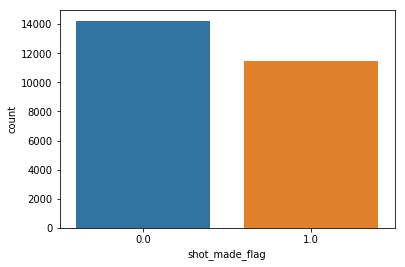

In [155]:
sns.countplot(x='shot_made_flag', data=kobe_cut)

#### Попробуем разобраться с точностью в зависимости от расстояния, заданного различными способами

Сначала разобьём на бины по 3 фута округлённое расстояние броска (shot_distance), а затем точное (dist)

In [156]:
distance_bins = np.append(np.arange(0, 31, 3), 300) 
distance_cat = pd.cut(kobe_cut['shot_distance'], distance_bins, right=False)

dist_data = kobe_cut.loc[:, ['shot_distance', 'shot_made_flag']]
dist_data['distance_cat'] = distance_cat

distance_cat.value_counts(sort=False)

[0, 3)       6759
[3, 6)       1275
[6, 9)       2035
[9, 12)      2017
[12, 15)     2782
[15, 18)     4045
[18, 21)     3992
[21, 24)     2054
[24, 27)     4738
[27, 30)      789
[30, 300)     211
Name: shot_distance, dtype: int64

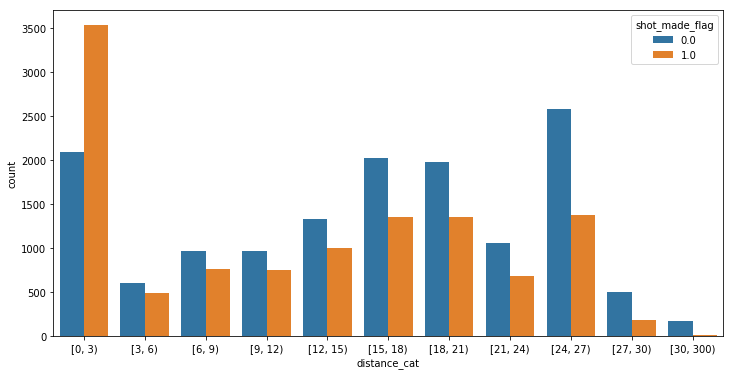

In [157]:
plt.figure(figsize=(12,6))
sns.countplot(x="distance_cat", hue="shot_made_flag", data=dist_data)

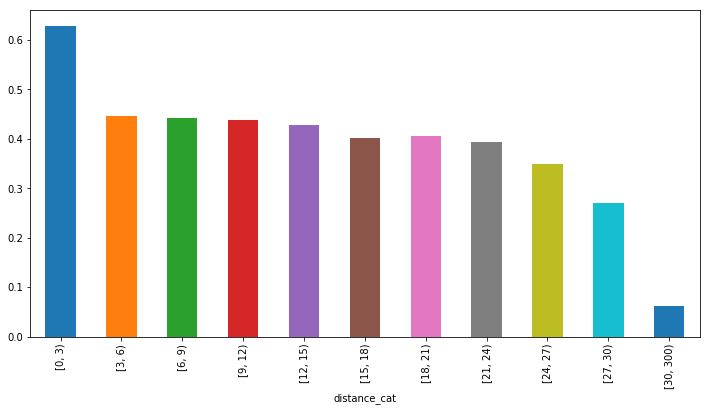

In [158]:
dist_prec = dist_data['shot_made_flag'].groupby(dist_data['distance_cat']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

In [159]:
distance_bins = np.append(np.arange(0, 80, 3), 300) 
distance_cat = pd.cut(kobe_cut['dist'], distance_bins, right=False)

dist_data = kobe_cut.loc[:, ['dist', 'shot_made_flag']]
dist_data['distance_cat'] = distance_cat

distance_cat.value_counts(sort=False)

[0, 3)        5253
[3, 6)          93
[6, 9)         141
[9, 12)        162
[12, 15)       160
[15, 18)       244
[18, 21)       185
[21, 24)       198
[24, 27)       178
[27, 30)       145
[30, 33)       123
[33, 36)       111
[36, 39)       106
[39, 42)       105
[42, 45)       121
[45, 48)       104
[48, 51)       123
[51, 54)       161
[54, 57)       158
[57, 60)       163
[60, 63)       181
[63, 66)       194
[66, 69)       209
[69, 72)       211
[72, 75)       209
[75, 78)       211
[78, 300)    21237
Name: dist, dtype: int64

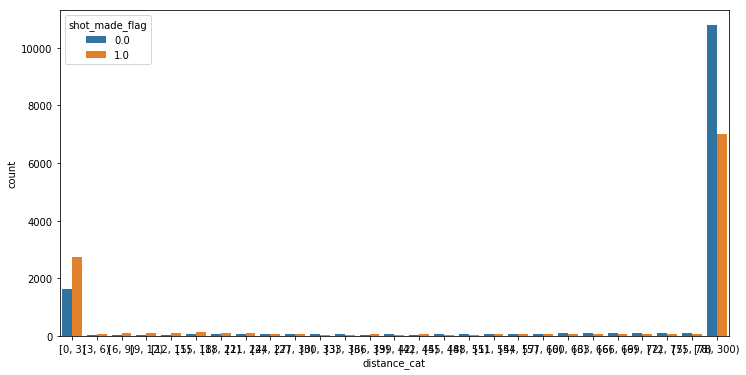

In [160]:
plt.figure(figsize=(12,6))
sns.countplot(x="distance_cat", hue="shot_made_flag", data=dist_data)

Видимо в расчёте расстояния где-то есть ошибка, но вообще округлённое значение расстояния определённо даёт очень неплохое представление о данных (например, виден всплеск количества бросков на отметке 24 фута - линия трёхочкового броска), сразу удалим столбец dist, да и angle тоже, будем продолжать с категориями по секторам поля (есть подозрение, что с т.з. знатоков баскетбола это более правильное деление и точное значение угла броска + точное расстояние вызовет переобучение)

In [161]:
kobe_cut = kobe_cut.drop('dist', axis=1)

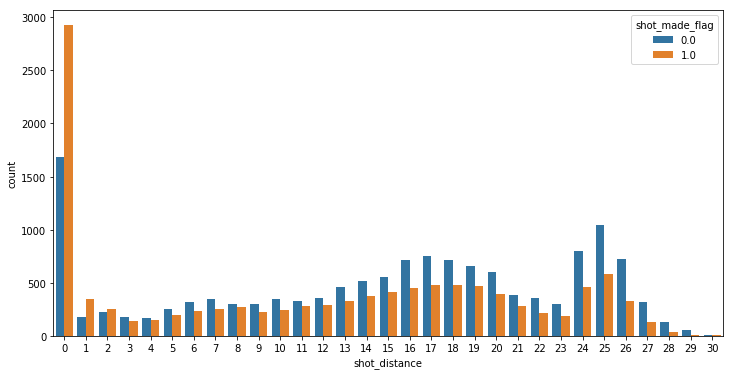

In [162]:
plt.figure(figsize=(12,6))
less300feet_kobe_cut = kobe_cut[kobe_cut['shot_distance']<=30]
sns.countplot(x="shot_distance", hue="shot_made_flag", data=less300feet_kobe_cut)

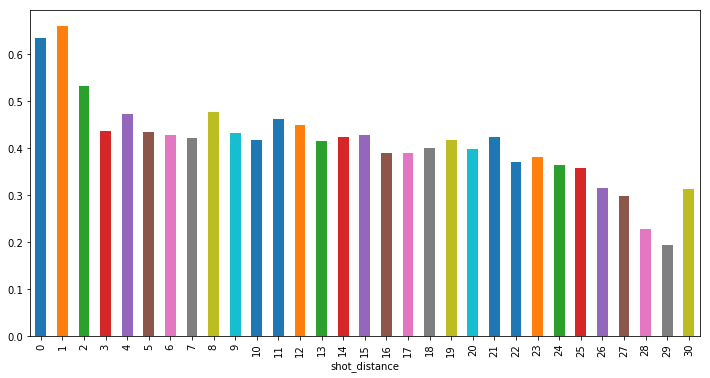

In [163]:
dist_prec = less300feet_kobe_cut['shot_made_flag'].groupby(less300feet_kobe_cut['shot_distance']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

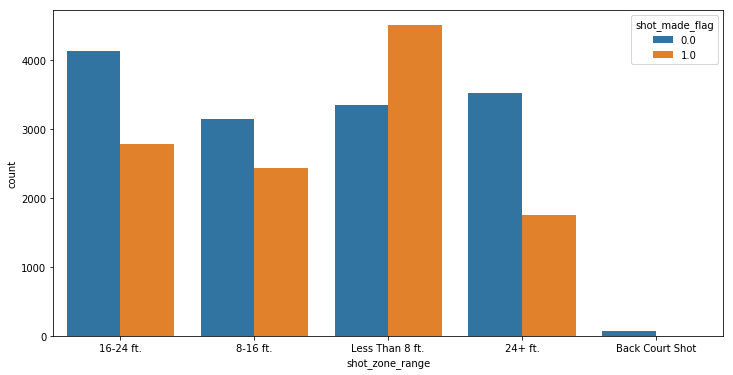

In [164]:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=kobe_cut)

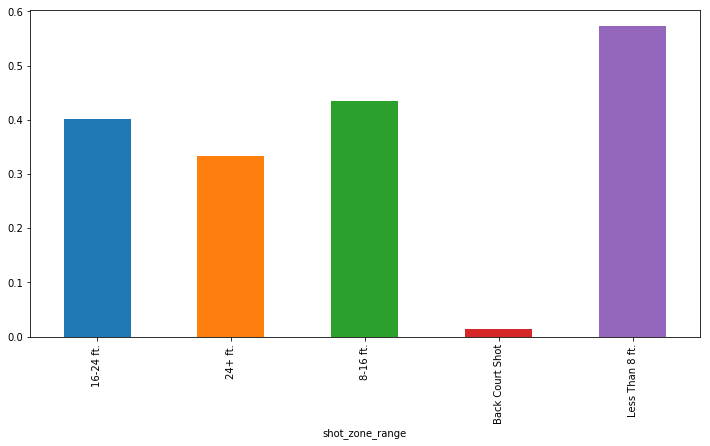

In [165]:
dist_prec = kobe_cut['shot_made_flag'].groupby(kobe_cut['shot_zone_range']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

Есть мнение, что данные категории расстояния броска всё-таки излишне обобщают, удалим эти категории и сделаем свои, как мы делали выше - бины по 3 фута каждый (занятно, что если посмотреть на эту разбивку хорошо видны всплески по количеству на расстояниях около различных линий, интересно, что это, психология, или расчёт, может тактически за этими линиями располагается защита противника...) 

и удалим shot_distance и shot_zone_range

In [166]:
distance_bins = np.append(np.arange(0, 31, 3), 300) 
kobe_cut['shot_dist_3ft'] = pd.cut(kobe_cut['shot_distance'], distance_bins, right=False)

In [167]:
kobe_cut = kobe_cut.drop(['shot_distance','shot_zone_range'], axis=1)

### Заменим огромное количество значений action_type с небольшим количеством на категорию other, за критерий возьмём например "менее 1% от общего количества"

Затем преобразуем категориальные переменные

In [168]:
series = pd.value_counts(kobe_cut['action_type'])
mask = (series/series.sum() * 100).lt(1)
kobe_cut['action_type'] = np.where(kobe_cut['action_type'].isin(series[mask].index),'Other',kobe_cut['action_type'])

In [169]:
#посмотрим что получилось
kobe_cut[['action_type','shot_made_flag' ]].groupby(['action_type']).agg('count').sort_values('shot_made_flag', ascending = False)

,shot_made_flag
action_type,
Jump Shot,15836
Layup Shot,2154
Driving Layup Shot,1628
Other,1556
Turnaround Jump Shot,891
Fadeaway Jump Shot,872
Running Jump Shot,779
Pullup Jump shot,402
Turnaround Fadeaway shot,366


In [170]:
kobe_cut.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,shot_made_flag,shot_zone_area,shot_zone_basic,opponent,3pt_flag,game_year,game_day_year,game_day_week,remaining_time_sec,home_match_flag,angle,shot_dist_3ft
shot_id,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,NaN,Right Side(R),Mid-Range,POR,0,2000,305,1,627,0,0.407058,"[18, 21)"
2,Jump Shot,Jump Shot,-157,0,1,0,0.0,Left Side(L),Mid-Range,POR,0,2000,305,1,622,0,-0.000000,"[15, 18)"
3,Jump Shot,Jump Shot,-101,135,1,0,1.0,Left Side Center(LC),Mid-Range,POR,0,2000,305,1,465,0,-0.928481,"[15, 18)"
4,Jump Shot,Jump Shot,138,175,1,0,0.0,Right Side Center(RC),Mid-Range,POR,0,2000,305,1,412,0,0.903063,"[21, 24)"
5,Driving Dunk Shot,Dunk,0,0,2,0,1.0,Center(C),Restricted Area,POR,0,2000,305,1,379,0,1.570796,"[0, 3)"


In [171]:
kobe_cut_dump = kobe_cut

In [175]:
#если что-то пойдёт не так :)
#kobe_cut = kobe_cut_dump

In [176]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period',
    'shot_zone_area', 'shot_zone_basic', 'shot_dist_3ft', 'game_year',
    'game_day_week', 'opponent']
kobe_cut.reset_index()
for cc in categorial_cols:
    dummies = pd.get_dummies(kobe_cut[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    #kobe_cut.drop(cc, axis=1, inplace=True)
    kobe_cut = kobe_cut.join(dummies)

In [179]:
kobe_cut.head()

,loc_x,loc_y,playoffs,shot_made_flag,3pt_flag,game_day_year,remaining_time_sec,home_match_flag,angle,action_type#Driving Dunk Shot,...,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS
shot_id,,,,,,,,,,,,,,,,,,,,,
1,167,72,0,NaN,0,305,627,0,0.407058,0,...,0,0,1,0,0,0,0,0,0,0
2,-157,0,0,0.0,0,305,622,0,-0.000000,0,...,0,0,1,0,0,0,0,0,0,0
3,-101,135,0,1.0,0,305,465,0,-0.928481,0,...,0,0,1,0,0,0,0,0,0,0
4,138,175,0,0.0,0,305,412,0,0.903063,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1.0,0,305,379,0,1.570796,1,...,0,0,1,0,0,0,0,0,0,0


In [178]:
for cc in categorial_cols:
    kobe_cut.drop(cc, axis=1, inplace=True)